# AE2: Wypełnianie koła prostokątami
Adrianna Grudzień

Rozwiązanie wariantu problemu znanego w literaturze jako `cutting stock` problem.

Mamy dane koło o promieniu r oraz zbiór dostępnych prostokątów zadanych przez trzy liczby: wysokość, szerokość i wartość.

Celem jest ułożenie prostokątów w kole tak, aby zmaksymalizować sumę ich wartości, spełniając następujące warunki:

- boki wszystkich prostokątów były równoległe do osi układu,
- wnętrza prostokątów nie miały części wspólnej (intuicyjnie: prostokąty nie nachodzą na siebie, ale mogą się stykać bokami),
- każdy prostokąt można wstawić dowolnie wiele razy.


- rotacja prostokąta to tak jakby inny prostokąt

# Opis koncepcji rozwiązania
Dla każdego osobnika przechowywana jest lista prostokątów oraz ich współrzędnych w układzie.

**1. Inicjalizacja populacji.** \
Najpierw obliczam pole koła i obliczam ile maksymalnie prostokątów się w nim zmieści (na podstawie pola powierzchni) - n. Następnie wybieram losowo 1 punkt z koła (środek prostokąta). Sprawdzanie zaczynam od największego możliwego prostokąta - jeśli się nie mieści, sprawdzam coraz to mniejsze prostokąty.

**2. Warunek stopu.** \
Ustalona a priori liczba iteracji.
<!-- Określony poziom znalezionego rozwiązania wynikający z kryteriów oceny zadania. To znaczy wartość sumaryczna prostokątów przynajmniej 30 000 w kole o średnicy 800 oraz 30 000 w kole o średnicy 1 200, minimum 17 500 w kole o średnicy 1 000 oraz minimum 25 000 w kole o średnicy 1 100. -->

**3. Krzyżowanie.** \
Losuję 2 rozwiązania z populacji. Nowego osobnika tworzę z prostokątów z górnej połowy pierwszego z nich oraz dolnej połowy drugiego z nich (tzn. biorę prostokąty, których środek się tam znajduje).

**4. Mutacja.** \
Przesunięcie wszystkich prostokątów o losową wartość w losową stronę. \
Jeżeli na kole jest jeszcze miejsce, to wstawiam tam prostokąt. (Obliczam ile maksymalnie najmniejszych prostokątów się mieści. Zaczynam od największego możliwego i jeśli po wylosowaniu okazuje się, że jednak się nie mieści, to testuję mniejsze prostokąty.

**5. Ewaluacja.** \
Liczę nagrodę, czyli zarobione z danego wycięcia pieniądze.

**6. Selekcja.** \
W populacji zostawiam te wycięcia, które jednocześnie mają najwyższą funkcję nagrody i prostokąty nie wychodzą poza koło.

## Metody (funkcje) pomocnicze

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
r = 1000 # promień koła

In [3]:
def max_count_of_rectangles(r, recArea):
    cirArea = np.pi*np.square(r)
    return int(np.floor(cirArea/recArea))

In [4]:
max_count_of_rectangles(1000, 200*150)

104

## Sortowanie desek względem $ za jednostkę

In [187]:
r1000 = pd.read_csv('data/r1000.csv', header=None)
r1000.columns = ['szer.', 'wys.', '$']
n = len(r1000)
for i in range(n):
    r1000.loc[n+i] = [r1000.iloc[i][1], r1000.iloc[i][0], r1000.iloc[i][2]] # prostokąty w rotacji 90 stopni
    
r1000

,szer.,wys.,$
0,200,120,200
1,200,160,300
2,250,160,500
3,100,120,40
4,120,200,200
5,160,200,300
6,160,250,500
7,120,100,40


In [188]:
# r1000['pole pow.'] = r1000['szer.']*r1000['wys.']
# r1000['$ ważona'] = r1000['$']/r1000['pole pow.']

In [189]:
# r1000 = r1000.sort_values(['$ ważona'], ascending=False, ignore_index=True)

W nazwie pliku jest podany `promień koła`, plik jest w formacie csv: pierwsza kolumna to `szerokość` prostokąta, druga to `wysokość`, trzecia to `wartość` prostokąta.

# Funkcje pomocnicze

In [8]:
def losuj_wspolrzedne_punktu(r):
    x = np.random.randint(-r,r)
    y = np.random.randint(-r,r)
    return [x,y]
    
losuj_wspolrzedne_punktu(100)

[-62, -85]

In [9]:
def licz_wspolrzedne_wierzcholkow(wspolrzedne_srodka, wymiary_prostokata):
    '''Współrzędne kolejno: górna lewa, dolna lewa, dolna prawa, górna prawa'''
    x_srodka, y_srodka = wspolrzedne_srodka
    szerokosc, wysokosc = wymiary_prostokata
    x1, y1 = int(x_srodka-szerokosc/2), int(y_srodka+wysokosc/2)
    x2, y2 = int(x_srodka-szerokosc/2), int(y_srodka-wysokosc/2)
    x3, y3 = int(x_srodka+szerokosc/2), int(y_srodka-wysokosc/2)
    x4, y4 = int(x_srodka+szerokosc/2), int(y_srodka+wysokosc/2)
    return [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
    
licz_wspolrzedne_wierzcholkow([0,0], [100, 40])    

[[-50, 20], [-50, -20], [50, -20], [50, 20]]

In [10]:
def sprawdz_czy_punkt_lezy_wewnatrz_okregu(r, punkt):
    return np.square(punkt[0])+np.square(punkt[1]) <= np.square(r)

print(sprawdz_czy_punkt_lezy_wewnatrz_okregu(100, [100,100]))
print(sprawdz_czy_punkt_lezy_wewnatrz_okregu(100, [0,100]))

False
True


In [11]:
def sprawdz_czy_prostokat_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow):
    if sprawdz_czy_punkt_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow[0]):
        if sprawdz_czy_punkt_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow[1]):
            if sprawdz_czy_punkt_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow[2]):
                if sprawdz_czy_punkt_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow[3]):
                    return True
    else:
        return False

sprawdz_czy_prostokat_lezy_wewnatrz_okregu(100, [[-50, 20], [-50, -20], [50, -20], [50, 20]])

True

In [12]:
def losuj_prostokat(data):
    '''data - np. r1000'''
    n = data.shape[0]
    nr_prostokata = np.random.randint(n)
    return list(np.array(data.iloc[nr_prostokata][:3]).astype(int))

losuj_prostokat(r1000)

[160, 250, 500]

In [13]:
import matplotlib
from matplotlib import pyplot as plt, patches

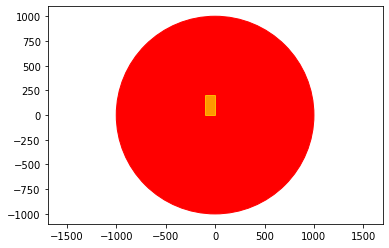

In [85]:
def rysuj(r, lista_prostokatow):
    '''lista_prostokatow [dolny_lewy_wierzcholek, wymiary]'''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    circle = patches.Circle((0,0), radius=r, color='red')
    ax.add_patch(circle)
    for i in range(len(lista_prostokatow)):
        dolny_lewy_wierzcholek, wymiary = lista_prostokatow[i]
        rect = patches.Rectangle(dolny_lewy_wierzcholek, wymiary[0], wymiary[1], color='yellow', alpha=0.6)
        ax.add_patch(rect)
    plt.axis('equal')
    plt.show()
    
rysuj(1000, [[[-100,0], [100,200]]])

In [66]:
def czy_punkt_lezy_wewnatrz_prostokata(wspolrzedne_punktu, wspolrzedne_wierzcholkow):
    x, y = wspolrzedne_punktu
    if x <= wspolrzedne_wierzcholkow[3][0] and x>= wspolrzedne_wierzcholkow[1][0]:
        if y <= wspolrzedne_wierzcholkow[0][1] and y >= wspolrzedne_wierzcholkow[1][1]:
            return True
    return False

czy_punkt_lezy_wewnatrz_prostokata([0,0], [[-50, 20], [-50, -20], [50, -20], [50, 20]])        

True

In [87]:
def czy_prostokaty_zachodza_na_siebie(dane_prostokata1, dane_prostokata2):
    '''dane_prostokata - [współrzędne środka, wymiary]
    Koncepcja: jeśli prostokąty zachodzą na siebie, tzn. że któryś wierzchołek któregoś
    z prostokątów musi leżeć wewnątrz tego drugiego.'''
    wspolrzedne1 = licz_wspolrzedne_wierzcholkow(dane_prostokata1[0], dane_prostokata1[1][:2])
    wspolrzedne2 = licz_wspolrzedne_wierzcholkow(dane_prostokata2[0], dane_prostokata2[1][:2])
    for i in range(4):
        if czy_punkt_lezy_wewnatrz_prostokata(wspolrzedne1[i], wspolrzedne2):
            return True
    for i in range(4):
        if czy_punkt_lezy_wewnatrz_prostokata(wspolrzedne2[i], wspolrzedne1):
            return True

    return False

czy_prostokaty_zachodza_na_siebie([[-557, 121], [160, 200, 300]],
 [[551, -621], [100, 120, 40]])
czy_prostokaty_zachodza_na_siebie([[-557, 121], [160, 200, 300]],
    [[-467, 121], [160, 200, 300]])

True

In [233]:
def wyrzuc_niepoprawne_prostokaty(r, osobnik):
    '''Bierzemy pierwszy prostokąt z brzegu i sprawdzamy czy nie wychodzi poza okrąg 
    oraz ze wszystkimi, czy nie zachodzi na nie.
    osobnik - lista prostokatow [wsp. środa, miary prostokąta]'''
    # rysuj(r, osobnik)
    prostokaty_do_usuniecia = []
    
    #czy prostokąty są wewnątrz okręgu:
    for i in range(len(osobnik)):
        prostokat = osobnik[i]
        wspolrzedne_srodka, dane_prostokata = prostokat
        wspolrzedne_wierzcholkow = licz_wspolrzedne_wierzcholkow(wspolrzedne_srodka, dane_prostokata[:2])
        # rysuj(self.r, [[wspolrzedne_wierzcholkow[1], dane_prostokata[:2]]])
        if not sprawdz_czy_prostokat_lezy_wewnatrz_okregu(r, wspolrzedne_wierzcholkow):
            del osobnik[i]
            
    # zachodzenie na siebie:
    iter = 0
    wszystko_sprawdzone = False
    while not wszystko_sprawdzone:
        czy_sprawdzone_wszystkie_j = False
        prostokat1 = osobnik[iter]
        
        while not czy_sprawdzone_wszystkie_j:
            
            for j in range(len(osobnik)):
                if j==len(osobnik)-1:
                    iter+=1
                if iter==len(osobnik)-1 and j==len(osobnik)-1:
                    czy_sprawdzone_wszystkie_j = True
                if j != iter: # każdy prostokąt sam ze sobą zachodzi na siebie...
                    prostokat2 = osobnik[j]
                    if czy_prostokaty_zachodza_na_siebie(prostokat1,prostokat2):
                        del osobnik[j]
                        break
             
        wszystko_sprawdzone=True
        
    # rysuj(r, osobnik)
    return osobnik

wyrzuc_niepoprawne_prostokaty(1000, [
    [[-557, 121], [160, 200, 300]],
    [[-467, 121], [160, 200, 300]],
    [[-637, 121], [160, 200, 300]],
    [[751, -621], [100, 120, 40]]
])

[[[-557, 121], [160, 200, 300]], [[-637, 121], [160, 200, 300]]]

In [234]:
wyrzuc_niepoprawne_prostokaty(1000, [
    [[-557, 121], [160, 200, 300]],
    [[-467, 121], [160, 200, 300]],
    [[-637, 121], [160, 200, 300]],
    [[751, -621], [100, 120, 40]]
])

[[[-557, 121], [160, 200, 300]], [[-637, 121], [160, 200, 300]]]

In [212]:
def licz_cene_osobnika(osobnik):
    cena = 0
    for i in range(len(osobnik)):
        cena += osobnik[i][1][2]
    return cena

licz_cene_osobnika([
    [[-557, 121], [160, 200, 300]],
    [[551, -621], [100, 120, 40]]
])

340

In [133]:
def get_k_max_arg(lista,k):
    '''k indeksów największych elementów listy'''
    sorted_list = sorted(lista, reverse=True)
    k_max_values = sorted_list[:k]
    k_indexes = []
    for i in range(k):
        k_indexes.append(lista.index(k_max_values[i]))
    return k_indexes

get_k_max_arg([1,4,2,10],2)

[3, 1]

# Klasy

In [203]:
import pandas as pd

In [235]:
class AE:
    def __init__(self, N, r, data, verbose_step=10):
        self.N = N # liczność populacji
        self.r = r # promień kół
        self.data = data # info o wymiarach i cenie
        self.population = [] # lista list prostokątów (współrzędna środa, wymiary, cena)
        self.verbose_step = verbose_step
        self._initialize_population()
        
        self.new_population = copy.deepcopy(self.population) # populacja, do której będą dodawane nowe osobniki
        self.mean_price = []
        
    def _initialize_population(self):
        # osobnik początkowo ma w sobie 1 prostokąt
        for i in range(self.N):
            osobnik_stworzony = False
            while not osobnik_stworzony:
                wspolrzedne_srodka = losuj_wspolrzedne_punktu(self.r)
                dane_prostokata = losuj_prostokat(self.data)
                wspolrzedne_wierzcholkow = licz_wspolrzedne_wierzcholkow(wspolrzedne_srodka, dane_prostokata[:2])
                # rysuj(self.r, [[wspolrzedne_wierzcholkow[1], dane_prostokata[:2]]])
                if sprawdz_czy_prostokat_lezy_wewnatrz_okregu(self.r, wspolrzedne_wierzcholkow):
                    self.population.append([ #okrąg = lista prostokątów
                            [wspolrzedne_srodka, dane_prostokata]#prostokąt
                        ])
                    osobnik_stworzony = True
      
    def select_radomly_from_population(self):
        '''Losowanie dowolnego osobnika z populacji.'''
        randomRectangle = np.random.randint(self.N)
        return self.population[randomRectangle]
    
    def cross(self, prob_boundary=0.7):
        '''
        Krzyżowanie.
        Losujemy 2 osobniki x1, x2 i tworzymy nowego osobnika z górnej połowy wartości x1
        oraz dolnej połowy wartości x2.
        '''
        
        drawn_prob = np.random.uniform(0,1) # wylosowane prawdopodobieństwo krzyżowania dla danych osobników
        if drawn_prob <= prob_boundary:
            # losowanie osobników
            x1 = self.select_radomly_from_population()
            x2 = self.select_radomly_from_population()
            

            # łączenie osobników
            x_new = []
            for i in range(len(x1)):
                if x1[0][i][1] >= 0:
                    x_new.append(x1[i])
            for i in range(len(x2)):
                if x2[0][i][1] < 0:
                    x_new.append(x2[i])
                

            # dodanie nowego osobnika do populacji
            self.new_population.append(x_new)
        
    def mutate(self, x, prob_boundary=0.2):
        '''Mutacja gaussowska - wylosowanie zgodnie z rozkładem normalnym 
        przesunięcia wszystkich prostokątów w dowolnym kierunków (poziomo i pionowo)
        
        x - mutowany osobnik
        prob_boundary - prawdopodobieństwo mutacji na pojedynczy osobniku (prawd. graniczne)
        '''
    
        drawn_prob = np.random.uniform(0,1) # wylosowane prawdopodobieństwo mutacji dla danego osobnika
        if drawn_prob <= prob_boundary:
            vector_displacement_x = np.random.normal(0, 1)
            vector_displacement_y = np.random.normal(0, 1)

            x_new = []
            for i in range(len(x)):
                wspolrzedne_srodka = x[i][0]
                miary_prostokata = x[i][1]
                x_new.append([
                    [wspolrzedne_srodka[0]+vector_displacement_x, wspolrzedne_srodka[1]+vector_displacement_y],
                    miary_prostokata
                ])
            # usuwamy niepoprawne prostokąty:
            x_new = wyrzuc_niepoprawne_prostokaty(self.r, x_new)
            
            # dodanie nowego osobnika do populacji
            self.new_population.append(x_new)
            
       
        
    def evaluate(self):
        '''Liczenie wartości $ osobników.'''
        price_arr = []
        for osobnik in self.new_population:
            price_arr.append(licz_cene_osobnika(osobnik))
        return price_arr
        
    def select(self):
        '''Algorytm selekcji - w populacji zostawiamy self.N osobników o najniższych wartościach funkcji optymalizowanej.'''
        price_arr = self.evaluate()
        price_arg = get_k_max_arg(price_arr, self.N) # numery indeksów z największymi wartościami ceny
        self.population = []
        for i in range(len(price_arg)):
            self.population.append(self.new_population[i])
        self.new_population = copy.deepcopy(self.population) 
        
        max_k_prices = []
        for i in range(len(price_arg)):
            max_k_prices.append(price_arr[i])
        self.mean_price.append(np.mean(max_k_prices))

    def fit(self, n_epochs=10):
        iter = 0
        while iter < n_epochs:
            for i in range(self.N):
                self.cross()
            for i in range(self.N):
                x = self.population[i]
                self.mutate(x)
            
            self.select()
            if iter%self.verbose_step==0:
                print('epoch: ',iter)
            iter+=1
        

In [ ]:
ae = AE(N=10, r=1000, data=r1000, verbose_step=2)
ae.fit(n_epochs=100)
plt.plot(range(len(ae.mean_price)), ae.mean_price)

In [ ]:
r1100 = pd.read_csv('data/r1100.csv', header=None)
r1200 = pd.read_csv('data/r1200.csv', header=None)
r800 = pd.read_csv('data/r800.csv', header=None)
r850 = pd.read_csv('data/r850.csv', header=None)